In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# KNN visualization
def plot(X, y, sample=None, closest=None):
    plt.rcParams["figure.figsize"] = (3,3)

    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if sample is not None:
        plt.scatter([sample[0]], [sample[1]], c=[2], alpha=1.0)
        for i in closest:
            x, y = [sample[0], X[i,0]], [sample[1], X[i,1]]
            plt.plot(x, y, color="red", alpha=.5)

    plt.axis('equal')
    plt.show()

Training data:


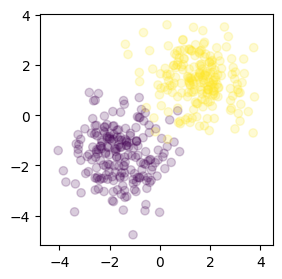

In [12]:
# create synthetic data
mean1 = np.asarray([-1.5, -1.5])
mean2 = np.asarray([1.5, 1.5])
cov = np.asarray([[1,0],[0,1]])

# training set of 2D points with two classes - used to create a model
training_size = 200
X1 = np.random.multivariate_normal(mean1, cov, training_size)
X2 = np.random.multivariate_normal(mean2, cov, training_size)
X_train = np.concatenate((X1, X2), axis=0)
y_train = [0]*training_size + [1]*training_size

print('Training data:')
plot(X_train, y_train)

Testing data:


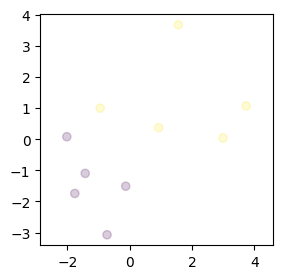

In [14]:
# testing set of 2D points with two classes - used to evaluate a model
test_size = 5
X1 = np.random.multivariate_normal(mean1, cov, test_size)
X2 = np.random.multivariate_normal(mean2, cov, test_size)
X_test = np.concatenate((X1, X2), axis=0)
y_test = [0]*test_size + [1]*test_size

print('Testing data:')
plot(X_test, y_test)

0 [0, 0, 0]


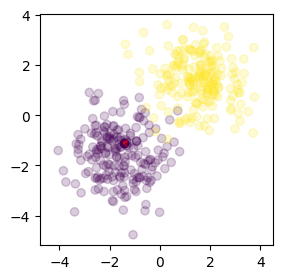

0 [0, 0, 0]


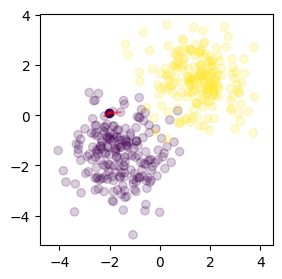

0 [0, 0, 0]


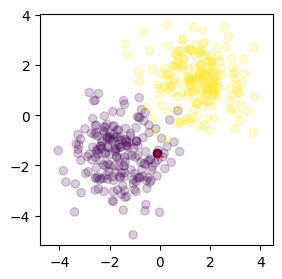

0 [0, 0, 0]


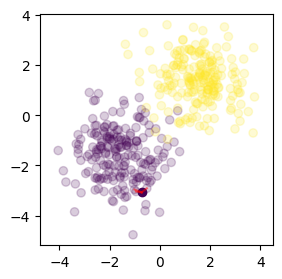

0 [0, 0, 0]


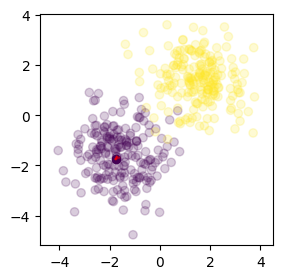

1 [1, 0, 1]


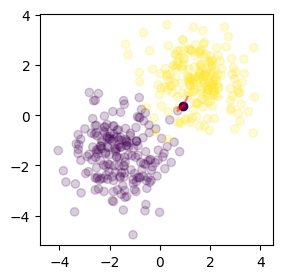

1 [1, 1, 1]


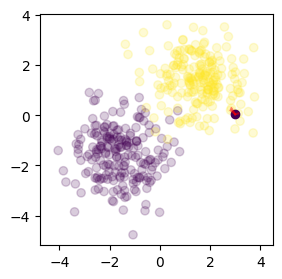

1 [0, 1, 0]


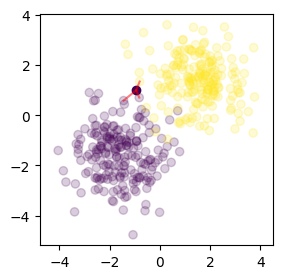

1 [1, 1, 1]


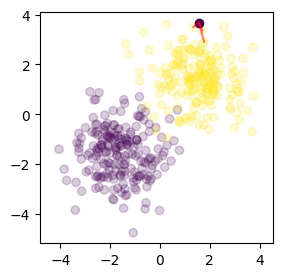

1 [1, 1, 1]


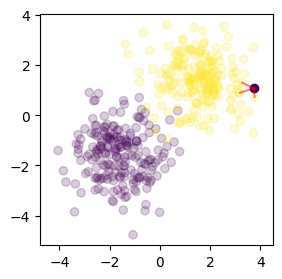

Accuracy: 90.00%


In [20]:
# KNN hyperparameter
K = 3

# repeat for all test points
correct = 0
for i in range(len(X_test)):
    # find K closest points in the training data
    distance_to_training = np.sum((X_train-X_test[i])**2, axis=1)
    topK = np.argpartition(distance_to_training, K)[:K]

    # show closest points
    print(y_test[i], [y_train[i] for i in topK])
    plot(X_train, y_train, X_test[i], topK)

    # majority voting
    y_inferred = np.bincount([y_train[i] for i in topK]).argmax()
    if y_inferred == y_test[i]:
        correct += 1
        
print('Accuracy: {:.2f}%'.format(100.0*correct/len(X_test)))